## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 
### Boston Dataset 

In [3]:
X,Y = bostonDataset.boston_data()
n_features = 13 
n_samples = 506 
n_target = 1 

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.745
Model:                            OLS   Adj. R-squared (uncentered):              0.737
Method:                 Least Squares   F-statistic:                              88.07
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                   2.10e-107
Time:                        10:44:18   Log-Likelihood:                         -289.56
No. Observations:                 404   AIC:                                      605.1
Df Residuals:                     391   BIC:                                      657.1
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

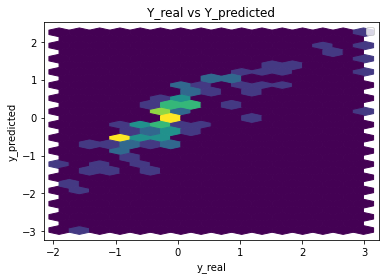

Performance Metrics
Mean Squared Error: 0.3264388895060364
Mean Absolute Error: 0.41265069073827615
Manhattan distance: 42.090370455304175
Euclidean distance: 5.770335062161963


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.11940287798277971


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.033215


0:	learn: 0.9550035	total: 57.6ms	remaining: 57.6s
1:	learn: 0.9375000	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9182712	total: 59.7ms	remaining: 19.9s
3:	learn: 0.9018141	total: 60.7ms	remaining: 15.1s
4:	learn: 0.8885168	total: 61.7ms	remaining: 12.3s
5:	learn: 0.8724228	total: 62.6ms	remaining: 10.4s
6:	learn: 0.8583266	total: 63.5ms	remaining: 9.01s
7:	learn: 0.8437744	total: 64.6ms	remaining: 8.01s
8:	learn: 0.8286837	total: 65.6ms	remaining: 7.22s
9:	learn: 0.8137010	total: 66.5ms	remaining: 6.59s
10:	learn: 0.8015872	total: 67.4ms	remaining: 6.06s
11:	learn: 0.7875803	total: 68.4ms	remaining: 5.63s
12:	learn: 0.7730263	total: 69.3ms	remaining: 5.26s
13:	learn: 0.7586810	total: 70.1ms	remaining: 4.94s
14:	learn: 0.7473553	total: 71ms	remaining: 4.66s
15:	learn: 0.7349224	total: 71.9ms	remaining: 4.42s
16:	learn: 0.7196950	total: 72.7ms	remaining: 4.2s
17:	learn: 0.7076632	total: 73.6ms	remaining: 4.01s
18:	learn: 0.6960806	total: 74.4ms	remaining: 3.84s
19:	learn: 0.6844033	tota

120:	learn: 0.2894138	total: 158ms	remaining: 1.15s
121:	learn: 0.2884868	total: 159ms	remaining: 1.15s
122:	learn: 0.2870574	total: 160ms	remaining: 1.14s
123:	learn: 0.2861898	total: 161ms	remaining: 1.14s
124:	learn: 0.2846124	total: 162ms	remaining: 1.13s
125:	learn: 0.2833135	total: 163ms	remaining: 1.13s
126:	learn: 0.2818782	total: 163ms	remaining: 1.12s
127:	learn: 0.2807644	total: 164ms	remaining: 1.12s
128:	learn: 0.2793604	total: 165ms	remaining: 1.11s
129:	learn: 0.2782289	total: 166ms	remaining: 1.11s
130:	learn: 0.2773004	total: 167ms	remaining: 1.1s
131:	learn: 0.2761529	total: 168ms	remaining: 1.1s
132:	learn: 0.2751538	total: 168ms	remaining: 1.1s
133:	learn: 0.2743752	total: 169ms	remaining: 1.09s
134:	learn: 0.2735778	total: 170ms	remaining: 1.09s
135:	learn: 0.2724656	total: 171ms	remaining: 1.08s
136:	learn: 0.2717693	total: 172ms	remaining: 1.08s
137:	learn: 0.2705140	total: 173ms	remaining: 1.08s
138:	learn: 0.2696161	total: 173ms	remaining: 1.07s
139:	learn: 0.2

160:	learn: 0.2491656	total: 192ms	remaining: 1s
161:	learn: 0.2480424	total: 193ms	remaining: 1s
162:	learn: 0.2475882	total: 194ms	remaining: 997ms
163:	learn: 0.2467229	total: 195ms	remaining: 993ms
164:	learn: 0.2458491	total: 196ms	remaining: 990ms
165:	learn: 0.2451994	total: 196ms	remaining: 987ms
166:	learn: 0.2442813	total: 197ms	remaining: 983ms
167:	learn: 0.2434566	total: 198ms	remaining: 980ms
168:	learn: 0.2429960	total: 199ms	remaining: 977ms
169:	learn: 0.2422334	total: 199ms	remaining: 974ms
170:	learn: 0.2414288	total: 200ms	remaining: 971ms
171:	learn: 0.2406877	total: 201ms	remaining: 968ms
172:	learn: 0.2399583	total: 202ms	remaining: 965ms
173:	learn: 0.2393021	total: 203ms	remaining: 962ms
174:	learn: 0.2384483	total: 203ms	remaining: 958ms
175:	learn: 0.2378312	total: 204ms	remaining: 956ms
176:	learn: 0.2369716	total: 205ms	remaining: 953ms
177:	learn: 0.2361295	total: 206ms	remaining: 951ms
178:	learn: 0.2353379	total: 207ms	remaining: 947ms
179:	learn: 0.2348

229:	learn: 0.2052480	total: 248ms	remaining: 829ms
230:	learn: 0.2047422	total: 249ms	remaining: 828ms
231:	learn: 0.2041955	total: 250ms	remaining: 826ms
232:	learn: 0.2034748	total: 250ms	remaining: 824ms
233:	learn: 0.2029491	total: 251ms	remaining: 822ms
234:	learn: 0.2026457	total: 252ms	remaining: 821ms
235:	learn: 0.2020928	total: 253ms	remaining: 819ms
236:	learn: 0.2016235	total: 254ms	remaining: 817ms
237:	learn: 0.2010637	total: 254ms	remaining: 815ms
238:	learn: 0.2005290	total: 255ms	remaining: 813ms
239:	learn: 0.1998818	total: 256ms	remaining: 811ms
240:	learn: 0.1992730	total: 257ms	remaining: 809ms
241:	learn: 0.1988917	total: 258ms	remaining: 807ms
242:	learn: 0.1986162	total: 259ms	remaining: 805ms
243:	learn: 0.1979866	total: 259ms	remaining: 803ms
244:	learn: 0.1977146	total: 260ms	remaining: 802ms
245:	learn: 0.1972921	total: 261ms	remaining: 800ms
246:	learn: 0.1966331	total: 262ms	remaining: 798ms
247:	learn: 0.1963724	total: 262ms	remaining: 796ms
248:	learn: 

346:	learn: 0.1579466	total: 349ms	remaining: 657ms
347:	learn: 0.1575879	total: 350ms	remaining: 656ms
348:	learn: 0.1571862	total: 351ms	remaining: 654ms
349:	learn: 0.1568071	total: 352ms	remaining: 653ms
350:	learn: 0.1564932	total: 352ms	remaining: 652ms
351:	learn: 0.1563383	total: 353ms	remaining: 650ms
352:	learn: 0.1558732	total: 354ms	remaining: 649ms
353:	learn: 0.1555511	total: 355ms	remaining: 648ms
354:	learn: 0.1552492	total: 356ms	remaining: 646ms
355:	learn: 0.1549574	total: 357ms	remaining: 645ms
356:	learn: 0.1545769	total: 357ms	remaining: 644ms
357:	learn: 0.1543745	total: 358ms	remaining: 642ms
358:	learn: 0.1540147	total: 359ms	remaining: 641ms
359:	learn: 0.1536889	total: 360ms	remaining: 640ms
360:	learn: 0.1534252	total: 361ms	remaining: 638ms
361:	learn: 0.1530831	total: 361ms	remaining: 637ms
362:	learn: 0.1526192	total: 362ms	remaining: 636ms
363:	learn: 0.1523712	total: 363ms	remaining: 634ms
364:	learn: 0.1519487	total: 364ms	remaining: 633ms
365:	learn: 

386:	learn: 0.1462571	total: 383ms	remaining: 607ms
387:	learn: 0.1459040	total: 384ms	remaining: 605ms
388:	learn: 0.1457099	total: 385ms	remaining: 604ms
389:	learn: 0.1455412	total: 385ms	remaining: 603ms
390:	learn: 0.1451251	total: 386ms	remaining: 601ms
391:	learn: 0.1450298	total: 387ms	remaining: 600ms
392:	learn: 0.1447287	total: 388ms	remaining: 599ms
393:	learn: 0.1444599	total: 389ms	remaining: 598ms
394:	learn: 0.1442189	total: 390ms	remaining: 597ms
395:	learn: 0.1440477	total: 391ms	remaining: 596ms
396:	learn: 0.1436784	total: 391ms	remaining: 594ms
397:	learn: 0.1434411	total: 392ms	remaining: 593ms
398:	learn: 0.1433565	total: 393ms	remaining: 592ms
399:	learn: 0.1430278	total: 394ms	remaining: 591ms
400:	learn: 0.1429474	total: 395ms	remaining: 589ms
401:	learn: 0.1425071	total: 396ms	remaining: 588ms
402:	learn: 0.1422668	total: 396ms	remaining: 587ms
403:	learn: 0.1419696	total: 397ms	remaining: 586ms
404:	learn: 0.1416163	total: 398ms	remaining: 585ms
405:	learn: 

451:	learn: 0.1308008	total: 437ms	remaining: 530ms
452:	learn: 0.1306109	total: 438ms	remaining: 529ms
453:	learn: 0.1305258	total: 439ms	remaining: 528ms
454:	learn: 0.1303383	total: 440ms	remaining: 527ms
455:	learn: 0.1301718	total: 441ms	remaining: 526ms
456:	learn: 0.1300070	total: 442ms	remaining: 525ms
457:	learn: 0.1297308	total: 443ms	remaining: 524ms
458:	learn: 0.1295047	total: 444ms	remaining: 523ms
459:	learn: 0.1294416	total: 445ms	remaining: 522ms
460:	learn: 0.1292406	total: 446ms	remaining: 521ms
461:	learn: 0.1289202	total: 447ms	remaining: 520ms
462:	learn: 0.1287842	total: 448ms	remaining: 519ms
463:	learn: 0.1286502	total: 448ms	remaining: 518ms
464:	learn: 0.1285734	total: 449ms	remaining: 517ms
465:	learn: 0.1285072	total: 450ms	remaining: 516ms
466:	learn: 0.1283452	total: 451ms	remaining: 515ms
467:	learn: 0.1280010	total: 452ms	remaining: 514ms
468:	learn: 0.1277912	total: 453ms	remaining: 512ms
469:	learn: 0.1275526	total: 454ms	remaining: 511ms
470:	learn: 

571:	learn: 0.1078018	total: 538ms	remaining: 403ms
572:	learn: 0.1076085	total: 539ms	remaining: 402ms
573:	learn: 0.1075547	total: 540ms	remaining: 401ms
574:	learn: 0.1075029	total: 541ms	remaining: 400ms
575:	learn: 0.1073359	total: 542ms	remaining: 399ms
576:	learn: 0.1070904	total: 542ms	remaining: 398ms
577:	learn: 0.1067762	total: 543ms	remaining: 397ms
578:	learn: 0.1065538	total: 544ms	remaining: 396ms
579:	learn: 0.1065055	total: 545ms	remaining: 395ms
580:	learn: 0.1063759	total: 546ms	remaining: 394ms
581:	learn: 0.1061523	total: 547ms	remaining: 393ms
582:	learn: 0.1060218	total: 547ms	remaining: 392ms
583:	learn: 0.1057652	total: 548ms	remaining: 391ms
584:	learn: 0.1056941	total: 549ms	remaining: 390ms
585:	learn: 0.1055806	total: 550ms	remaining: 388ms
586:	learn: 0.1054523	total: 551ms	remaining: 387ms
587:	learn: 0.1053331	total: 552ms	remaining: 386ms
588:	learn: 0.1051777	total: 552ms	remaining: 385ms
589:	learn: 0.1050579	total: 553ms	remaining: 384ms
590:	learn: 

611:	learn: 0.1010348	total: 572ms	remaining: 362ms
612:	learn: 0.1009037	total: 573ms	remaining: 362ms
613:	learn: 0.1007247	total: 574ms	remaining: 361ms
614:	learn: 0.1005663	total: 574ms	remaining: 360ms
615:	learn: 0.1003522	total: 575ms	remaining: 359ms
616:	learn: 0.1003006	total: 576ms	remaining: 358ms
617:	learn: 0.1001824	total: 577ms	remaining: 357ms
618:	learn: 0.0998693	total: 578ms	remaining: 356ms
619:	learn: 0.0996727	total: 578ms	remaining: 355ms
620:	learn: 0.0993456	total: 579ms	remaining: 354ms
621:	learn: 0.0991390	total: 580ms	remaining: 353ms
622:	learn: 0.0988649	total: 581ms	remaining: 352ms
623:	learn: 0.0986942	total: 582ms	remaining: 351ms
624:	learn: 0.0985566	total: 583ms	remaining: 350ms
625:	learn: 0.0983225	total: 583ms	remaining: 348ms
626:	learn: 0.0981955	total: 584ms	remaining: 347ms
627:	learn: 0.0979719	total: 585ms	remaining: 346ms
628:	learn: 0.0979263	total: 586ms	remaining: 345ms
629:	learn: 0.0977068	total: 586ms	remaining: 344ms
630:	learn: 

678:	learn: 0.0907404	total: 627ms	remaining: 297ms
679:	learn: 0.0906638	total: 628ms	remaining: 296ms
680:	learn: 0.0905058	total: 629ms	remaining: 295ms
681:	learn: 0.0902891	total: 630ms	remaining: 294ms
682:	learn: 0.0900929	total: 631ms	remaining: 293ms
683:	learn: 0.0899121	total: 632ms	remaining: 292ms
684:	learn: 0.0898075	total: 633ms	remaining: 291ms
685:	learn: 0.0897440	total: 634ms	remaining: 290ms
686:	learn: 0.0897186	total: 634ms	remaining: 289ms
687:	learn: 0.0896774	total: 635ms	remaining: 288ms
688:	learn: 0.0895113	total: 636ms	remaining: 287ms
689:	learn: 0.0894360	total: 637ms	remaining: 286ms
690:	learn: 0.0892222	total: 638ms	remaining: 285ms
691:	learn: 0.0890887	total: 639ms	remaining: 284ms
692:	learn: 0.0888229	total: 640ms	remaining: 283ms
693:	learn: 0.0887970	total: 641ms	remaining: 282ms
694:	learn: 0.0886231	total: 641ms	remaining: 281ms
695:	learn: 0.0883876	total: 642ms	remaining: 280ms
696:	learn: 0.0882133	total: 643ms	remaining: 279ms
697:	learn: 

797:	learn: 0.0763603	total: 728ms	remaining: 184ms
798:	learn: 0.0763134	total: 729ms	remaining: 183ms
799:	learn: 0.0762679	total: 730ms	remaining: 183ms
800:	learn: 0.0760859	total: 731ms	remaining: 182ms
801:	learn: 0.0759537	total: 732ms	remaining: 181ms
802:	learn: 0.0757968	total: 733ms	remaining: 180ms
803:	learn: 0.0757222	total: 734ms	remaining: 179ms
804:	learn: 0.0756457	total: 734ms	remaining: 178ms
805:	learn: 0.0754832	total: 736ms	remaining: 177ms
806:	learn: 0.0753304	total: 736ms	remaining: 176ms
807:	learn: 0.0752280	total: 737ms	remaining: 175ms
808:	learn: 0.0750974	total: 738ms	remaining: 174ms
809:	learn: 0.0749797	total: 739ms	remaining: 173ms
810:	learn: 0.0749519	total: 740ms	remaining: 172ms
811:	learn: 0.0748312	total: 740ms	remaining: 171ms
812:	learn: 0.0746818	total: 741ms	remaining: 170ms
813:	learn: 0.0746481	total: 742ms	remaining: 170ms
814:	learn: 0.0745065	total: 743ms	remaining: 169ms
815:	learn: 0.0744764	total: 744ms	remaining: 168ms
816:	learn: 

838:	learn: 0.0721048	total: 762ms	remaining: 146ms
839:	learn: 0.0720717	total: 763ms	remaining: 145ms
840:	learn: 0.0719856	total: 764ms	remaining: 144ms
841:	learn: 0.0718358	total: 765ms	remaining: 143ms
842:	learn: 0.0717081	total: 765ms	remaining: 143ms
843:	learn: 0.0715845	total: 766ms	remaining: 142ms
844:	learn: 0.0715136	total: 767ms	remaining: 141ms
845:	learn: 0.0713919	total: 768ms	remaining: 140ms
846:	learn: 0.0713451	total: 769ms	remaining: 139ms
847:	learn: 0.0712079	total: 769ms	remaining: 138ms
848:	learn: 0.0710472	total: 770ms	remaining: 137ms
849:	learn: 0.0710189	total: 771ms	remaining: 136ms
850:	learn: 0.0709114	total: 772ms	remaining: 135ms
851:	learn: 0.0707837	total: 773ms	remaining: 134ms
852:	learn: 0.0707672	total: 774ms	remaining: 133ms
853:	learn: 0.0706498	total: 775ms	remaining: 132ms
854:	learn: 0.0706257	total: 776ms	remaining: 132ms
855:	learn: 0.0705478	total: 777ms	remaining: 131ms
856:	learn: 0.0705181	total: 777ms	remaining: 130ms
857:	learn: 

906:	learn: 0.0660888	total: 818ms	remaining: 83.8ms
907:	learn: 0.0660000	total: 819ms	remaining: 83ms
908:	learn: 0.0658865	total: 819ms	remaining: 82ms
909:	learn: 0.0657414	total: 820ms	remaining: 81.1ms
910:	learn: 0.0655976	total: 821ms	remaining: 80.2ms
911:	learn: 0.0654922	total: 822ms	remaining: 79.3ms
912:	learn: 0.0654644	total: 823ms	remaining: 78.4ms
913:	learn: 0.0653891	total: 824ms	remaining: 77.5ms
914:	learn: 0.0652704	total: 825ms	remaining: 76.6ms
915:	learn: 0.0651820	total: 825ms	remaining: 75.7ms
916:	learn: 0.0650870	total: 826ms	remaining: 74.8ms
917:	learn: 0.0650250	total: 827ms	remaining: 73.9ms
918:	learn: 0.0649214	total: 828ms	remaining: 73ms
919:	learn: 0.0648659	total: 829ms	remaining: 72.1ms
920:	learn: 0.0647712	total: 830ms	remaining: 71.2ms
921:	learn: 0.0647054	total: 831ms	remaining: 70.3ms
922:	learn: 0.0646609	total: 831ms	remaining: 69.4ms
923:	learn: 0.0646381	total: 832ms	remaining: 68.4ms
924:	learn: 0.0645542	total: 833ms	remaining: 67.5ms

## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 5000
batch_size = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 0.919877507068305
